# Driver D2 - analysis of tripMD outputs

## 1. Imports and data loading

In [1]:
freq_per_second = 5
output_name="D2_driver"

lat_index=0
lon_index=1

In [2]:
import os
import sys
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FILE_DIR = os.getcwd()
ROOT_DIR = os.path.abspath(os.path.join(FILE_DIR, os.pardir))
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))

from tripMD.cluster import plot_dtwsom_bmus
from utils import uah_eval, uah_viz

In [3]:
output_folder = os.path.join(ROOT_DIR, "outputs", output_name)

trip_list = pickle.load(open(os.path.join(output_folder, "trip_list.p"), "rb"))
motif_list = pickle.load(open(os.path.join(output_folder, "motifs.p"), "rb"))
pruned_motif_list = pickle.load(open(os.path.join(output_folder, "pruned_motifs.p"), "rb"))
dtwsom_model = pickle.load(open(os.path.join(output_folder, "dtwsom_model.p"), "rb"))
cluster_dict_list = pickle.load(open(os.path.join(output_folder, "dtwsom_clusters.p"), "rb"))
clusters_sum = pickle.load(open(os.path.join(output_folder, "clusters_summary.p"), "rb"))

motif_center_list = [motif.get_center_obs(trip_list) for motif in motif_list]

In [4]:
len(motif_list)

281

In [5]:
len(pruned_motif_list)

17

## 2. DTW-SOM plots

<img src="../../outputs/D2_driver/umatrix_plot.png" alt="drawing" width="400"/><img src="../../outputs/D2_driver/winner_plot.png" alt="drawing" width="265"/>

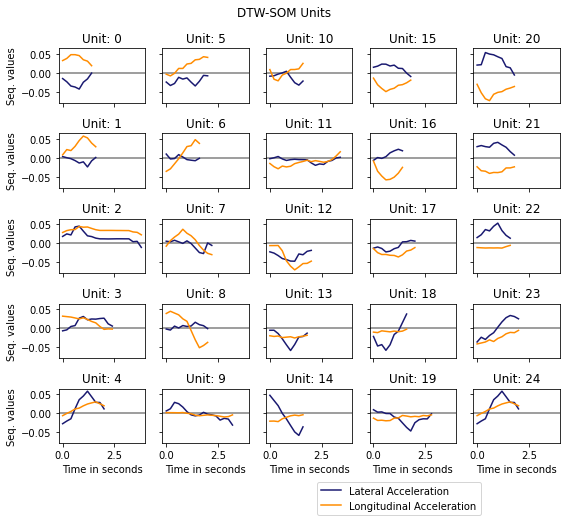

In [6]:
fig = plot_dtwsom_bmus(dtwsom_model, lat_index, lon_index, freq_per_second, figsize=(8, 7), suptitle="DTW-SOM Units")
plt.show()

## 3. Cluster analysis

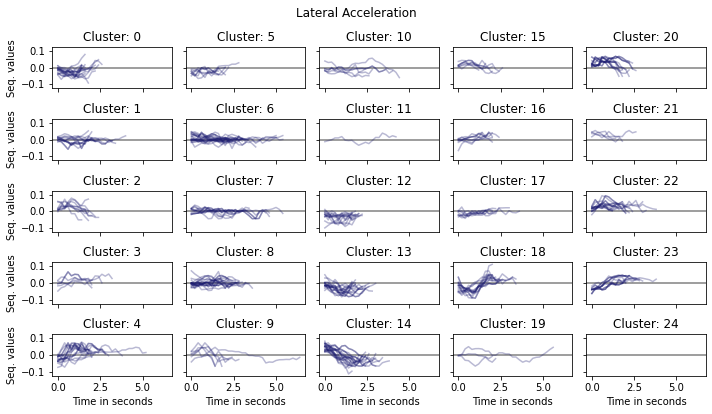

In [7]:
fig = uah_viz.plot_clusters_acceleration(dtwsom_model, motif_center_list, freq_per_second, 
                                         lat_index, color="midnightblue", suptitle="Lateral Acceleration")
plt.show()

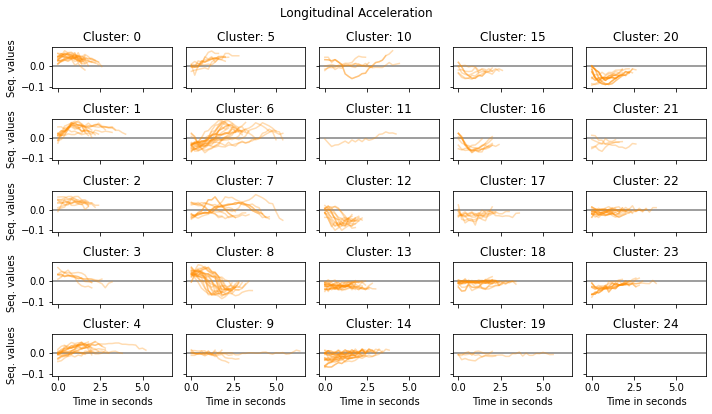

In [8]:
fig = uah_viz.plot_clusters_acceleration(dtwsom_model, motif_center_list, freq_per_second, 
                                         lon_index, color="darkorange", suptitle="Longitudinal Acceleration")
plt.show()

In [9]:
pd.DataFrame(clusters_sum)

,n_members,lat_maneuvers,lon_maneuvers
0,17,"[(neg_turn, 0.588), (high_neg_turn, 0.353), (n...","[(accel, 0.529), (strong_accel, 0.471)]"
1,13,"[(neg_turn, 0.538), (no_man, 0.308), (pos_turn...","[(strong_accel, 0.846), (accel, 0.077), (accel..."
2,9,"[(high_pos_turn, 0.556), (pos_turn, 0.444)]","[(accel, 0.667), (strong_accel, 0.333)]"
3,6,"[(high_pos_turn, 0.5), (pos_turn, 0.5)]","[(accel, 1.0)]"
4,17,"[(high_pos_turn, 0.588), (neg_turn-pos_turn, 0...","[(accel, 0.765), (no_man, 0.235)]"
5,8,"[(neg_turn, 0.75), (high_neg_turn, 0.125), (ne...","[(accel, 0.75), (strong_accel, 0.25)]"
6,21,"[(no_man, 0.476), (pos_turn, 0.381), (neg_turn...","[(brake-accel, 0.19), (brake-strong_accel, 0.1..."
7,12,"[(neg_turn, 0.667), (no_man, 0.333)]","[(accel, 0.417), (brake-accel, 0.167), (accel-..."
8,21,"[(no_man, 0.476), (pos_turn, 0.381), (neg_turn...","[(strong_brake, 0.19), (accel, 0.143), (accel-..."
9,6,"[(pos_turn-neg_turn, 0.5), (high_pos_turn, 0.3...","[(no_man, 0.667), (brake, 0.333)]"


## 5. Behavior cluster distribution

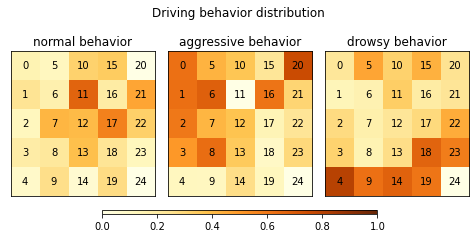

In [10]:
uah_viz.plot_cluster_behavior_rates(cluster_dict_list, trip_list, None, dtwsom_model._cols)
plt.suptitle("Driving behavior distribution")
plt.show()

In [11]:
label_counts_df = uah_eval.get_labels_counts_from_clusters(cluster_dict_list, trip_list, None)

In [12]:
label_counts_df[label_counts_df["behavior"]=="normal"].sort_values("label_rates", ascending=False).head()

,cluster_id,n_members,n_labeled_members,behavior,label_counts,label_rates
59,11,3.0,3.0,normal,2.0,0.666667
65,17,21.0,21.0,normal,12.0,0.571429
69,21,13.0,13.0,normal,6.0,0.461538
55,7,41.0,41.0,normal,17.0,0.414634
60,12,35.0,35.0,normal,14.0,0.400000


In [13]:
label_counts_df[label_counts_df["behavior"]=="aggressive"].sort_values("label_rates", ascending=False).head(9)

,cluster_id,n_members,n_labeled_members,behavior,label_counts,label_rates
20,20,40.0,40.0,aggressive,30.0,0.750000
6,6,102.0,102.0,aggressive,69.0,0.676471
8,8,101.0,101.0,aggressive,64.0,0.633663
1,1,75.0,75.0,aggressive,47.0,0.626667
0,0,53.0,53.0,aggressive,33.0,0.622642
16,16,41.0,41.0,aggressive,25.0,0.609756
2,2,25.0,25.0,aggressive,15.0,0.600000
3,3,16.0,16.0,aggressive,8.0,0.500000
5,5,26.0,26.0,aggressive,11.0,0.423077


In [14]:
label_counts_df[label_counts_df["behavior"]=="drowsy"].sort_values("label_rates", ascending=False).head(8)

,cluster_id,n_members,n_labeled_members,behavior,label_counts,label_rates
28,4,60.0,60.0,drowsy,48.0,0.800000
38,14,79.0,79.0,drowsy,53.0,0.670886
42,18,84.0,84.0,drowsy,56.0,0.666667
33,9,53.0,53.0,drowsy,33.0,0.622642
43,19,51.0,51.0,drowsy,31.0,0.607843
47,23,41.0,41.0,drowsy,24.0,0.585366
29,5,26.0,26.0,drowsy,12.0,0.461538
46,22,86.0,86.0,drowsy,38.0,0.441860


## 4. Prunned motifs

In [15]:
len(pruned_motif_list)

17

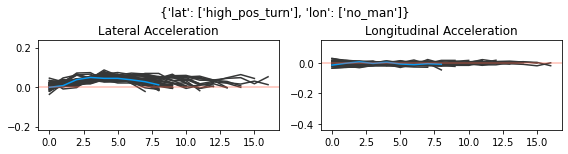

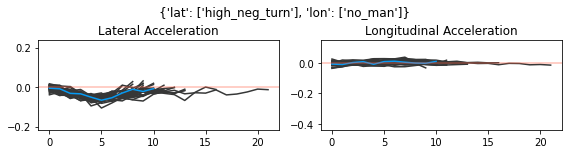

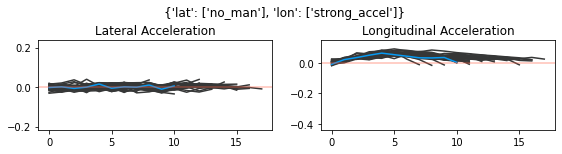

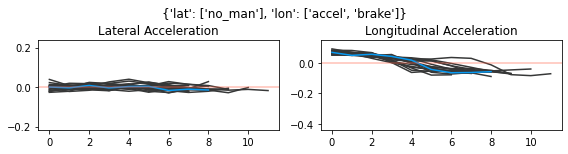

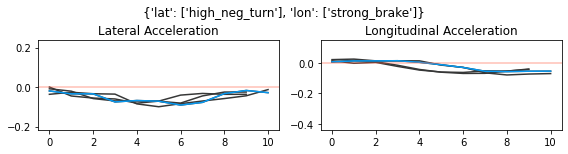

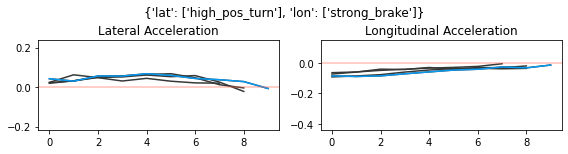

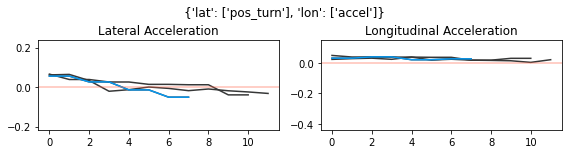

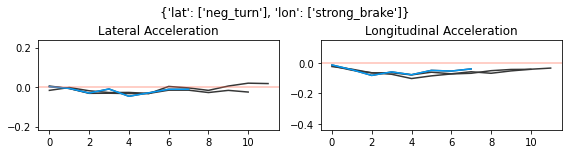

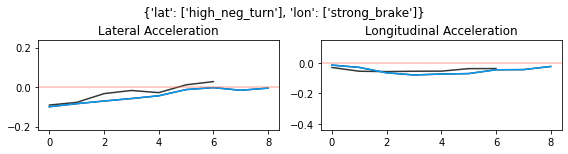

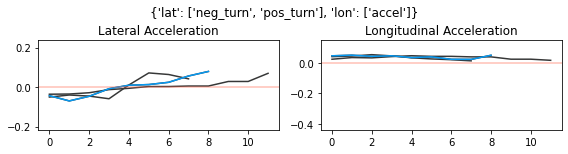

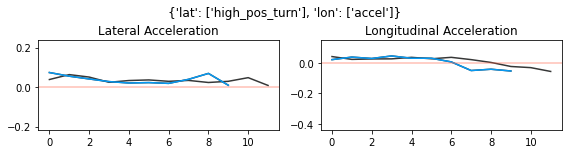

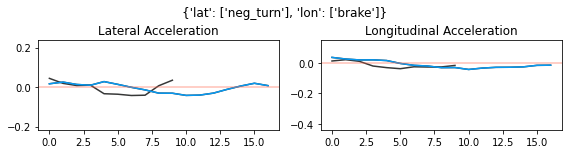

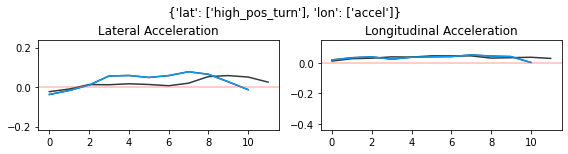

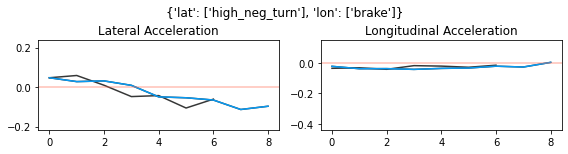

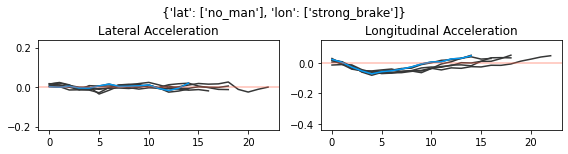

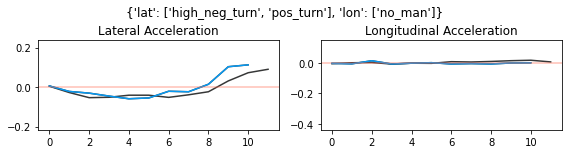

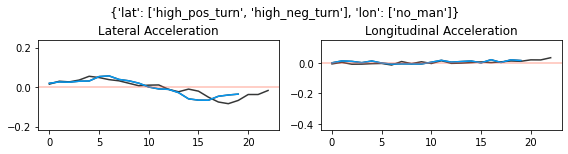

In [16]:
for motif in pruned_motif_list:
    uah_viz.plot_motif_members(motif, trip_list, lon_index, lat_index, True)
    plt.tight_layout()
    plt.show()